<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Spotify - Create radar chart to analyze playlist
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/template.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

#spotify #python #spotipy

## Input

### Import libraries

First you need to set up Spotify API at https://developer.spotify.com to get clientID and clientSecret

In [4]:
!pip install spotify
!pip install spotipy

     |████████████████████████████████| 46 kB 499 kB/s  eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [5]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from math import pi

### Variables

In [6]:
#Retrieve Client credentials from Spotify Developer Page
client_id = '3e80f904ee774c08ba6b1589be99b535'
client_secret = '76476d444f154ed695722670fc274751'

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#Retrieve playlist_id by getting the Spotify URI of any playlist
playlist_id = "spotify:playlist:5fqIcaihygJQGberg0wy0G"
results = sp.playlist(playlist_id)

min_max_scaler = MinMaxScaler()

## Model

### Function

In [7]:
#Function to Convert JSON to Dataframe
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

In [8]:
#Function for Data Pre-Processing
music_features=features_df[['danceability','energy','loudness','speechiness',
                            'acousticness','instrumentalness','liveness','valence',
                            'tempo','duration_ms']]

music_features.describe()
#Transforming Data so that all values are in the range 0 to 1
#To turn of warning run below command
pd.set_option('mode.chained_assignment', None)
music_features.loc[:]=min_max_scaler.fit_transform(music_features.loc[:])

## Output

### Display result

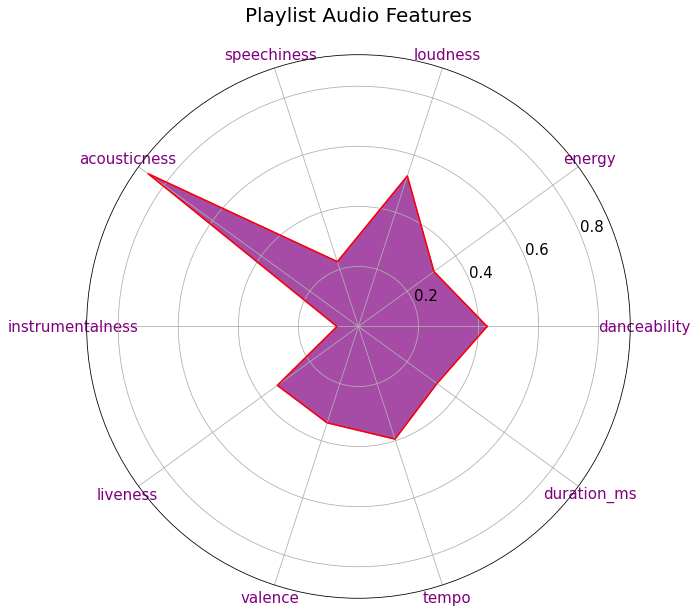

In [9]:
#Radar Chart with several heads from DataFrame
#Creating Radar Chart
fig = plt.figure(figsize=(10,10))

categories=list(music_features.columns)

N=len(categories)

value = list(music_features.mean())

value+=value[:1]
angles = [n/float(N)*2*pi for n in range(N)]
angles+= angles[:1]


plt.polar(angles,value,color='red')
plt.fill(angles,value,alpha=0.7,color='purple')

plt.title('Playlist Audio Features', size=20, y=1.05)

plt.xticks(angles[:-1],categories,size=15, color='purple')
plt.yticks(color='black', size=15)
plt.show()